## Load and import stuff

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('C:\Github\python-microgrid-realtime\logs\log-2025-02-17_13-01-25.csv')

df_soc = df['battery.4']
df_soc = df_soc.tail(df_soc.shape[0] - 2)

df_soc = df_soc.astype(float)

print(df_soc)
print(df_soc.dtypes)


2     0.500000
3     0.364051
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.168689
10    0.605471
11    0.374685
12    0.268461
13    0.713034
14    1.000000
15    0.549003
16    0.973567
17    0.580031
18    0.755302
19    0.658513
20    0.654730
21    0.329125
22    0.306201
23    0.180596
24    0.021139
25    0.000000
Name: battery.4, dtype: float64
float64


In [63]:
print(df.head())

            balancing     balancing.1          balancing.2        battery  \
0                   0               0                    0              0   
1           loss_load  overgeneration               reward  charge_amount   
2   61.10665041186324             0.0   -611.0665041186325            0.0   
3  20.002845337943526             0.0  -200.02845337943526            0.0   
4  15.940653507825637             0.0  -159.40653507825635            0.0   

            battery.1           battery.2 battery.3            battery.4  \
0                   0                   0         0                    0   
1      current_charge    discharge_amount    reward                  soc   
2                50.0  13.594880167751185      -0.0                  0.5   
3  36.405119832248815  36.405119832248815      -0.0  0.36405119832248817   
4                 0.0                 0.0      -0.0                  0.0   

           genset        genset.1  ...              balance  \
0               0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


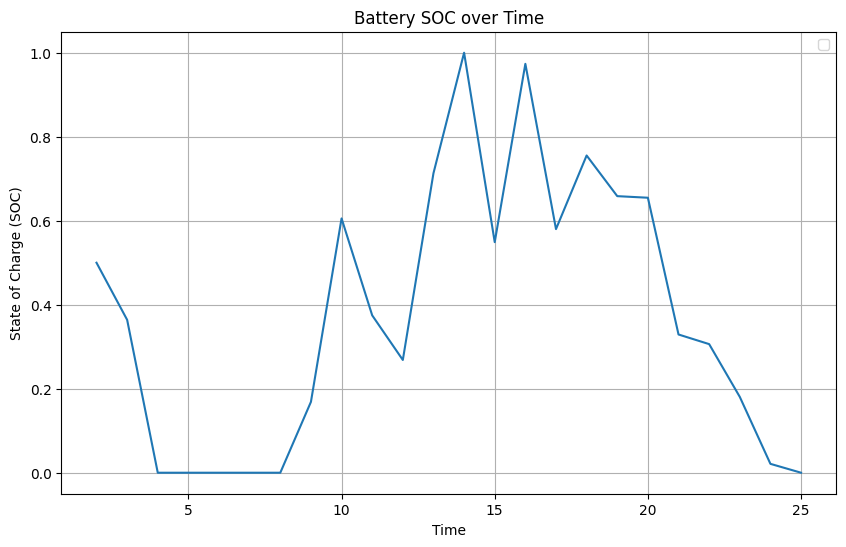

In [64]:
# Plot battery charge
# 1. Battery State of Charge (SOC) over Time
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_soc.index, df_soc)
plt.xlabel('Time')
plt.ylabel('State of Charge (SOC)')
plt.title('Battery SOC over Time')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()
